In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import re

from selenium import webdriver

from time    import sleep , time
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비
# import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier

from   sklearn.linear_model    import LogisticRegression

from   sklearn.svm             import SVC

from   sklearn.neighbors        import KNeighborsClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

sklearn.__version__

'0.24.2'

In [3]:
mnist = load_digits()
print('type - ' , type(mnist) )
print('keys - ' , mnist.keys())

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
features , labels = mnist.data , mnist.target

In [5]:
features.shape , labels.shape

((1797, 64), (1797,))

In [6]:
features[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [7]:
labels[1]

1

In [8]:
features[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

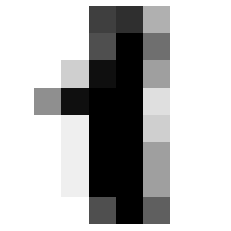

In [9]:
plt.imshow(features[1].reshape(8,8), cmap = matplotlib.cm.binary)


plt.axis('off')
plt.show()
plt.close()


In [10]:
X_train , X_test , y_train , y_test = train_test_split(features ,
                                                       labels ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [12]:
tree_model = DecisionTreeClassifier(criterion    = 'entropy' ,
                                    max_depth    = 8 ,
                                    max_features = 32 ,
                                    random_state = 35)
knn_model  = KNeighborsClassifier(n_neighbors = 299 )
svm_model  = SVC(probability = True )

In [13]:
def metrics_evaluation(target , prediction) :
    print('accuracy \n'    , accuracy_score(target , prediction))


In [15]:
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)


In [16]:
metrics_evaluation(y_test , tree_pred)
metrics_evaluation(y_test , knn_pred)
metrics_evaluation(y_test , svm_pred)

accuracy 
 0.8694444444444445
accuracy 
 0.8555555555555555
accuracy 
 0.9916666666666667


In [18]:
print('VotingClassifier hardVoting - ')
print()

hard_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model)] ,
                                      weights    = [1,1,1] ,
                                      voting     = 'hard' )


VotingClassifier hardVoting - 



In [20]:
hard_voting_model.fit(X_train , y_train)
hard_voting_pred = hard_voting_model.predict(X_test)
metrics_evaluation(y_test , hard_voting_pred)

accuracy 
 0.9611111111111111


In [21]:
soft_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model)] ,
                                      weights    = [1,1,1] ,
                                      voting     = 'soft' )

soft_voting_model.fit(X_train , y_train)
soft_voting_pred = soft_voting_model.predict(X_test)
metrics_evaluation(y_test , soft_voting_pred)

accuracy 
 0.9361111111111111


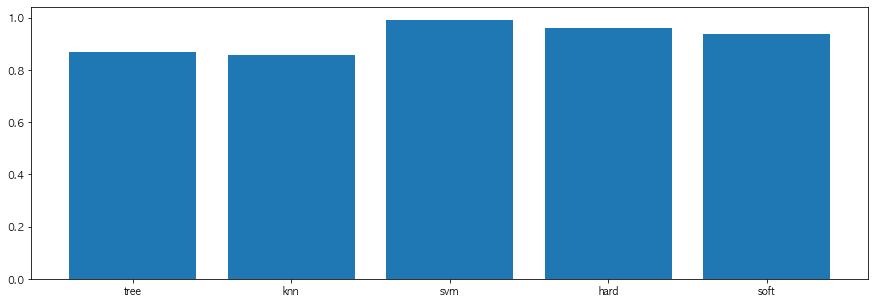

In [22]:
plt.figure( figsize = (15,5))

x = np.arange(5)

plt.bar(x , height = [
    accuracy_score(y_test , tree_pred) ,
    accuracy_score(y_test , knn_pred) ,
    accuracy_score(y_test , svm_pred) ,
    accuracy_score(y_test , hard_voting_pred) ,
    accuracy_score(y_test , soft_voting_pred) ,
])
plt.xticks(x , ['tree' , 'knn' , 'svm' , 'hard' , 'soft'])

plt.show()
plt.close()

In [2]:
print('데이터를 활용한 앙상블 [실습] - 시각화 ')

cancer = load_breast_cancer()
cancer.keys()

데이터를 활용한 앙상블 [실습] - 시각화 


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
tree_model     = DecisionTreeClassifier()
knn_model      = KNeighborsClassifier()
svm_model      = SVC(probability = True )
logistic_model = LogisticRegression()


hard_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model) , ('logistic' , logistic_model)] ,
                                      weights    = [1,1,1,1] ,
                                      voting     = 'hard' )

soft_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model) , ('logistic' , logistic_model)] ,
                                      weights    = [1,1,1,1] ,
                                      voting     = 'soft' )



In [4]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data ,
                                                       cancer.target ,
                                                       test_size = 0.2 ,
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [5]:
estimators = [tree_model , knn_model , svm_model, hard_voting_model , soft_voting_model ]
for e in estimators :
    e.fit(X_train , y_train)
    pred = e.predict(X_test)
    print(e.__class__.__name__ , '\t' , accuracy_score(y_test , pred) )


DecisionTreeClassifier 	 0.956140350877193
KNeighborsClassifier 	 0.9473684210526315
SVC 	 0.9473684210526315
VotingClassifier 	 0.9649122807017544
VotingClassifier 	 0.9736842105263158
